<a href="https://colab.research.google.com/github/cristianeprgs/arquivos_python/blob/main/Dicion%C3%A1rio_Trilha_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Esse trabalho tem como propósito verificar se os textos escolhidos seguem a Lei de Zipf. Foram escolhidos três textos, as Constituições de três países: Brasil, Estados Unidos e Espanha. O objetivo é verificar se essa Lei se aplica a textos de certo modo semelhantes (conjunto de leis de países democráticos), porém escritos em idiomas diferentes.  



### **Função de Tratamento de Texto**

In [ ]:
def replaceText(texto):

    for i in range(len(texto)):
        texto[i] = texto[i].lower() # para unicidade
        texto[i] = texto[i].replace('\n','')
        texto[i] = texto[i].replace('.','')
        texto[i] = texto[i].replace(',','')
        texto[i] = texto[i].replace('(','')
        texto[i] = texto[i].replace(')','')
        texto[i] = texto[i].replace('?','')
        texto[i] = texto[i].replace('§','')
        texto[i] = texto[i].replace('-','') 
        texto[i] = texto[i].replace(';','')    
        texto[i] = texto[i].replace('\'','')     
        texto[i] = texto[i].replace('º','')
        texto[i] = texto[i].replace('°','')

    return(texto)    

### **Função para criar Dicionário**

In [ ]:
def createDict(texto):
    mydict = {}                             # crie um dicionário vazio
    count = 0                               # contador auxiliar de palavras


    for line in texto:
        line = line.lower()                   # converte para lower
        words = line.split()                 # separa cada palavra
        for word in words:                      # para cada palavra em words
            count += 1                            # acrescenta o contador com o valor 1
            if word not in mydict.keys():         # se palavra não está no dicionário 
                mydict[word] = 1                    # acrescenta a word com o valor 1
            else:                                 # se a entrada já existe 
                mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente
    
  
    return(mydict, count)

### **Função Principal**

In [ ]:
import urllib.request  
import requests

textoBr = []
textoUsa = []
textoEsp = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/cristianeprgs/arquivos_python/main/Arquivos_Texto/constituicao_brasil.txt'): 
    textoBr.append(line.decode('utf-8-sig'))

for line in urllib.request.urlopen('https://raw.githubusercontent.com/cristianeprgs/arquivos_python/main/Arquivos_Texto/constituicao_eua.txt'): 
    textoUsa.append(line.decode('utf-8-sig'))

for line in urllib.request.urlopen('https://raw.githubusercontent.com/cristianeprgs/arquivos_python/main/Arquivos_Texto/constituicao_espanha.txt'): 
    textoEsp.append(line.decode('utf-8-sig'))

textoBr = replaceText(textoBr)
textoUsa = replaceText(textoUsa)
textoEsp = replaceText(textoEsp)

dictBr, countBr = createDict(textoBr)
dictUsa, countUsa = createDict(textoUsa)
dictEsp, countEsp = createDict(textoEsp)

print("Quantidade de palavras Constituição Brasileira:", countBr)
print("Quantidade de palavras Constituição Americana:  ", countUsa)
print("Quantidade de palavras Constituição Espanhola: ", countEsp)

Quantidade de palavras Constituição Brasileira: 75976
Quantidade de palavras Constituição Americana:   7569
Quantidade de palavras Constituição Espanhola:  17816


### **Gráfico da Constituição Brasileira**

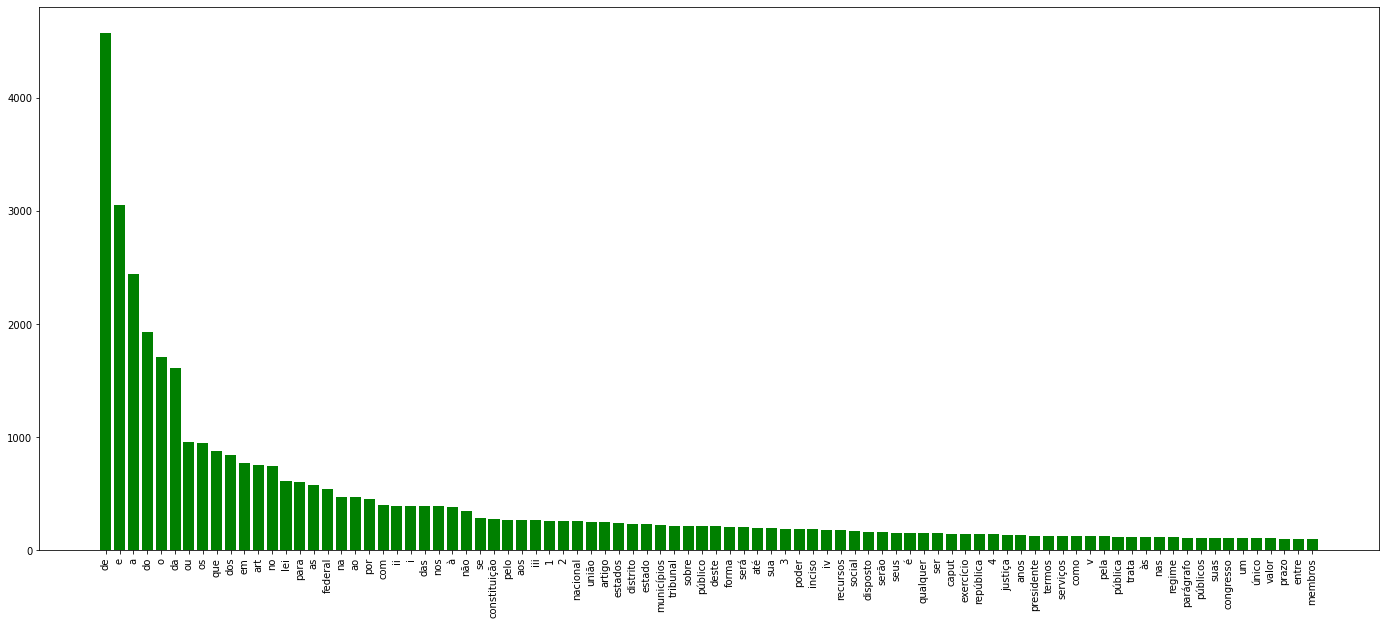

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


df1 = pd.DataFrame(dictBr.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df1 = df1[df1['count'] > 100] # somente termos com mais de 100 ocorrências, para garantir a proporção em relação aos outros textos
plt.figure(figsize=(24,10))
plt.bar(df1.word,df1['count'],color='green')
plt.xticks(rotation=90) 
plt.show()

### **Gráfico da Constituição Americana**

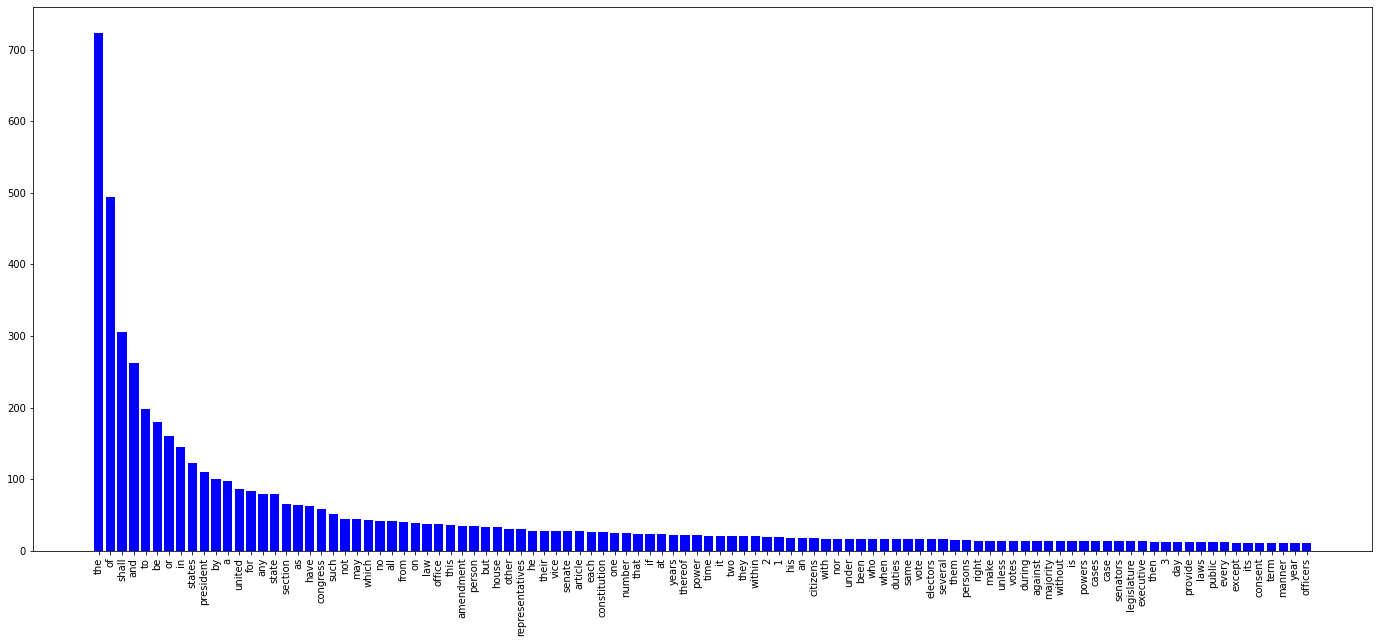

In [ ]:
df2 = pd.DataFrame(dictUsa.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df2 = df2[df2['count'] > 10] # somente termos com mais de 10 ocorrências, esse texto possui aproximadamente 10 vezes menos palavras que o texto anterior 

plt.figure(figsize=(24,10))
plt.bar(df2.word,df2['count'],color='blue')
plt.xticks(rotation=90) 
plt.show()

### **Gráfico da Constituição Espanhola**

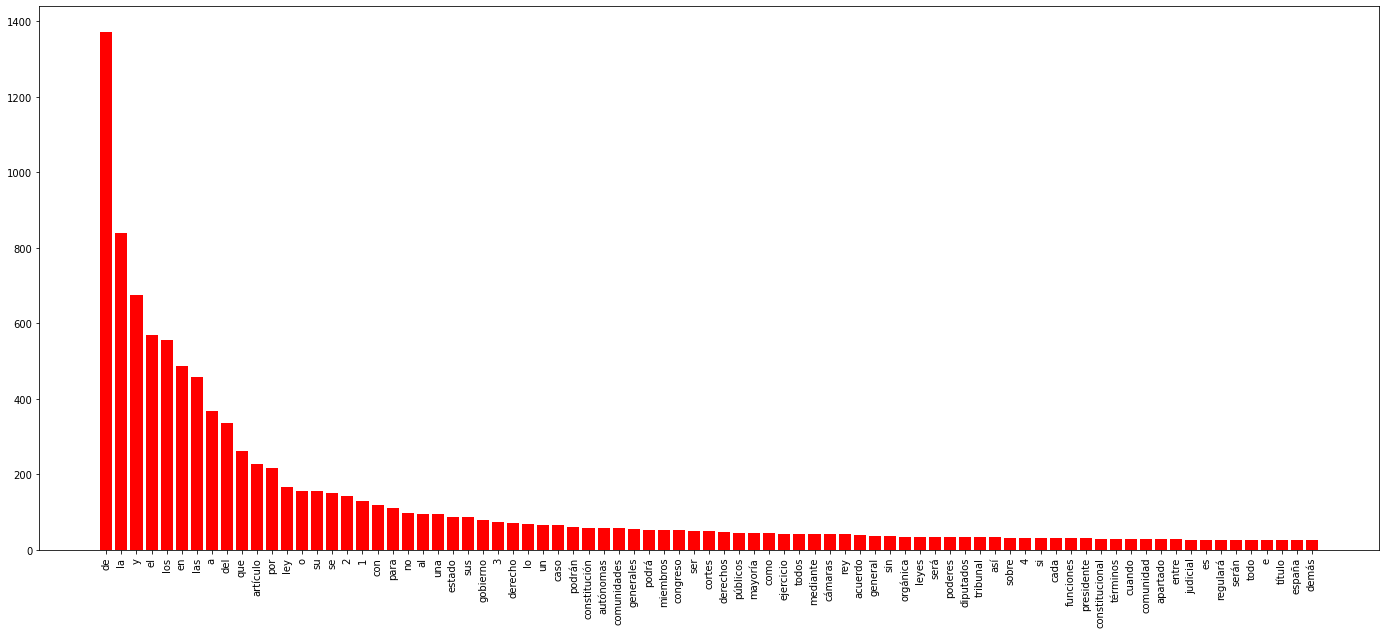

In [ ]:
df3 = pd.DataFrame(dictEsp.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df3 = df3[df3['count'] > 24] # somente termos com mais de 24 ocorrências, quantidade proporcional em relação ao textos anteriores

plt.figure(figsize=(24,10))
plt.bar(df3.word,df3['count'],color='red')
plt.xticks(rotation=90) 
plt.show()

# **Conclusão**

Pode-se concluir através da análise dos gráficos que os três textos seguem a Lei de Zipf quando consideramos todas as classes de palavras encontradas no texto (conjunções, preposições, artigos, pronomes), uma vez que esses elementos são os que mais ocorrem em qualquer texto de idiomas ocidentais. 

Se selecionadas as palavras mais frequentes, excetuando as classes gramaticais citadas acima, pode-se ter uma ideia do que se trata o texto. Abaixo seguem algumas palavras significativas mais comuns em cada um dos textos.  
- Constituição Brasileira: lei, constituição, nacional, união e estados.
- Constituição Americana: *state* (estado), *congress* (congresso), *law* (lei), *constitution* (constituição), *president* (presidente).
- Constituição Espanhola: *estado*, *gobierno* (governo), *derecho* (direito), *constitución* (constituição), *comunidades autónomas*.

Inclusive, pode-se notar semelhanças entre as palavras mais comuns entre as diferentes constituições, apesar das diferenças idiomáticas, culturais e históricas entre os países.